## SI 618 WN20 Final Project 
Name: Siyin Zheng 

Uniqname: zhengsy

### Introduction
This dataset describes the listing activity and metrics in NYC, NY for 2019. The dataset was created by Kaggle user Dgomonov (https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data), and this is a public dataset released by Airbnb. The original source can be found here (http://insideairbnb.com/), and it is sourced from publicly available information from the Airbnb site. The latest update date is December 04, 2019. 
### Data 
This data contains 16 columns, 48895 unique values. Imported all necessary files and packages, I removed unnecessary data from the data like last_review, name, id, and host name as they do not support the data required. I filled the missing values with zero, and did the visualization using seaborn, pyplot, matplotlib.
#### Variables
- id: listing ID
- name: name of the listing
- host_id: host ID
- host_name: name of the host
- neighbourhood_group: location
- neighbourhood: area
- latitude: latitude coordinateslatitude: latitude coordinates
- longitude: longitude coordinates
- room_type: listing space type
- price: price in dollars
- minimum_nights: amount of nights minimum
- number_of_reviews: number of reviews
- last_review: latest review
- reviews_per_month: number of reviews per month
- calculated_host_listings_count: amount of listing per host
- availability_365: number of days when listing is available for booking

### Following are a few questions that this analysis aims to answer:

- Which neighbourhood is expensive? 
- Which neighbourhood is popular? 
- What about price for different room types?
- Find out what features distinguish each neighbourhood and predict which listing is in which neighbood using current data.

### Data Processing 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
from sklearn.metrics import accuracy_score, classification_report
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

/Users/siyinzheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv('data/AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print("The number of rows of the dataset is: ", len(data))
print("The number of columns of the dataset is: ", len(data.columns))
print("The shape of the dataset is: ", data.shape) 

The number of rows of the dataset is:  48895
The number of columns of the dataset is:  16
The shape of the dataset is:  (48895, 16)


In [5]:
# Check the data types and available value number for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

From the table above, we could see some missing values, which will require cleaning and handling of NaN values.

In [6]:
data.isna().sum().sort_values(ascending=False)

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

It is good to observe that all the missing values cluster in "reviews_per_month", "last_review", "host_name", and "name". Columns "name" and "host_name" are irrelevant and insignificant to our data analysis. We have host_id which shares the same function to identity the host. Besides, for ethical reasons, we are not supposed to use real name to do data exploration and analysis. The necessary information "name" column provides could also be fulfilled by the location (longitude and latitue).

We could use simple method to deal with NaN value in "last_review" and "review_per_month". From the table we could know that "last_review" is the date of last review. If there is no review available ("number_of_reviews" column with the value of 0), the "last_review" will be filled with NaN, and the "reviews_per_month" will also be NaN. To deal with missing value, we could drop the column of "last_review", since it is not very relevant and useful. For the missing value in "reviews_per_month", we could simply fill in (0.0).

In addition, the "id" column has no special meaning other than listing identification, therefore we could also drop this column.

In [7]:
data.drop(['name','host_name','last_review','id'], axis=1, inplace=True)
data['reviews_per_month'].fillna(value=0, inplace=True)

In [8]:
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [9]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
# exploration of string column
for col in data[['neighbourhood_group', 'neighbourhood', 'room_type']]:
    print(f'Unique values in {col}:')
    print(data[col].unique())
    print('\n')

Unique values in neighbourhood_group:
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Unique values in neighbourhood:
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'East

### Question one: Which neighbourhood is expensive?

In [11]:
area_price = data[['neighbourhood_group','price']]
area_price.groupby('neighbourhood_group').describe()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                                     
                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

we can know from the describe table that we have some extreme values, therefore we need to remove them for the sake of a better visualization. Here I decided to keep the listings with the price under 600 (first try with 1000, which still contains many extreme values). After removing the extreme values, I would like to use a violinplot to visualize the density and distribution of prices across different neighbourhoods. 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

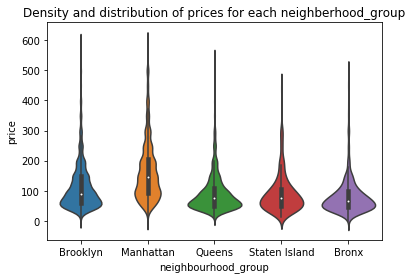

In [12]:
area_price_600 =area_price[area_price.price < 600]

# violinplot 
price_plot =sns.violinplot(data=area_price_600, x='neighbourhood_group', y='price')
price_plot.set_title('Density and distribution of prices for each neighberhood_group')


According to the violinplot and the summary table above, we could notice that airbnb places in Manhattan have relatively high average price. But from the distribution, it seems that the prices for majority listings across different neighborhood groups are all between 50 and 150. 

Therefore, for the next step I would like to explore if there are statistically significant differences between the prices in different neighborhoods.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
area_price2 = area_price.replace('Manhattan','1')

In [15]:
model_price_neighborhood = smf.ols('price ~ C(neighbourhood_group)', data=area_price2).fit()
model_price_neighborhood.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     355.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.72e-302
Time:                        20:56:59   Log-Likelihood:            -3.3669e+05
No. Observations:               48895   AIC:                         6.734e+05
Df Residuals:                   48890   BIC:                         6.734e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 196.8758      1.609    122.389      0.000     193.723     200.029
C(neighbourhood_group)[T.Bronx]          -109.3790      7.346    -14.890      0.000    -123.777     -94.981
C(neighbourhood_group)[T.Brooklyn]        -72.4926      2.319    -31.266      0.000     -77.037     -67.948
C(neighbourhood_group)[T.Queens]          -97.3582      3.533    -27.559      0.000    -104.282     -90.434
C(neighbourhood_group)[T.Staten Island]   -82.0635     12.364     -6.638      0.000    -106.296     -57.831
==============================================================================
Omnibus:                   106502.529   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        771576005.180
Skew:                          19.721   Prob(JB):                         0.00
Kurtosis:                     617.142   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
aov_table = sm.stats.anova_lm(model_price_neighborhood, typ=2)
print(aov_table)

                              sum_sq       df           F         PR(>F)
C(neighbourhood_group)  7.959096e+07      4.0  354.994839  7.723724e-302
Residual                2.740323e+09  48890.0         NaN            NaN


I used prices as dependent variable and neighborhood_group as independent variable. From the results, the R-squared is very small with the number of 0.028 which means only less than 3% of varience could be explained by the model. From the visualization above, we have already know that the average price of airbnb in Manhattan is higher than that in other neighborhoods. Therefore, to explore whether there are statistically significant differences between the prices in Manhattan and in different neighborhoods, I used Manhattan as reference neighborhood. 

Compared to the reference group, all four neighborhood groups are statistically significant with the p value of 0, which rejects the null and suggests that there are statistically significant differences between the airbnb prices in Manhattan and in different neighborhoods.

### Question two: Which area is popular?

In [17]:
data_0 = data.copy()
data_0.drop(data[data['number_of_reviews'] == 0].index, axis=0, inplace=True)

In [18]:
data_0.number_of_reviews.describe()

count    38843.000000
mean        29.297557
std         48.186374
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In order to have a better sense of the popular level. I remove the listing records with 0 reviews.
From the describe table above, we notice that half of the listings only with small amounts of reviews (under 10 reviews), and three quarters are under 35 reviews. I would like to define the popular level by the number of reviews: low level with number of reviews less or equal to 10; medium level with reviews from 10 to 35; high level with the reviews number over 35. 

In [19]:
data_0['popular'] = np.where(data_0['number_of_reviews'] > 10, 'medium','low')
data_0['popular'].value_counts()

low       20271
medium    18572
Name: popular, dtype: int64

In [20]:
data_0.loc[(data_0.number_of_reviews > 35),'popular']='high'

In [21]:
data_0['popular'].value_counts()

low       20271
medium     9300
high       9272
Name: popular, dtype: int64

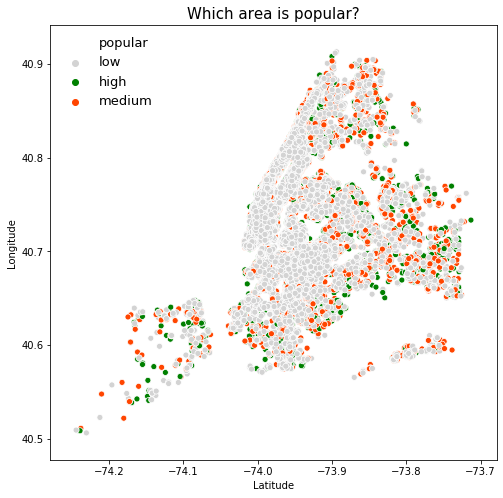

In [22]:
plt.figure(figsize=(8,8))
color = ['lightgray','g','orangered']
a = sns.scatterplot(data=data_0, x='longitude', y='latitude', hue='popular', palette=color)
plt.title('Which area is popular?', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

From the map above, we could clear see that almost no high/medium popular level records in Manhattan area. It seems like Queens and Bronx are the most popular areas. Considering the results we get from question one, we might think that the high price of Manhattan's airbnbs makes them least popular. Brooklyn gets a similar reslut. 

We could also get a hint from the price heat map below.

Text(0.5, 1.0, 'Airbnb prices in NYC')

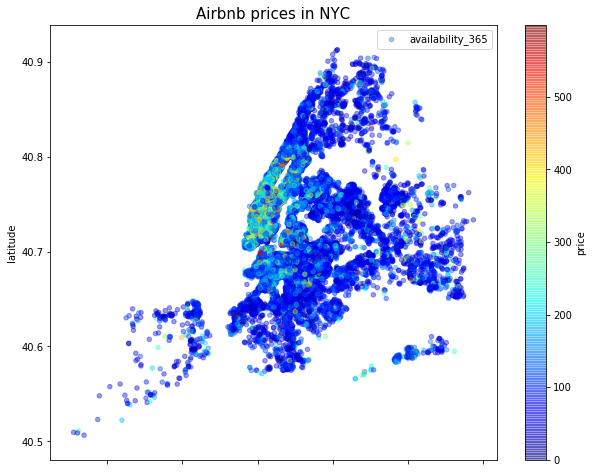

In [23]:
data_price_600 = data_0[data_0.price < 600]
price=data_price_600.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
price.legend()
plt.title("Airbnb prices in NYC", fontsize=15)

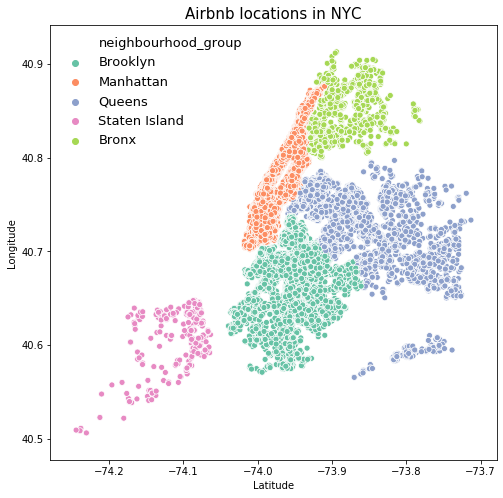

In [24]:
plt.figure(figsize=(8,8))
a = sns.scatterplot(data=data_0, x='longitude', y='latitude', hue='neighbourhood_group', palette='Set2')
plt.title('Airbnb locations in NYC', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

However, if we consider the popular level by looking at the number of listing record, we will get an opposite result. 

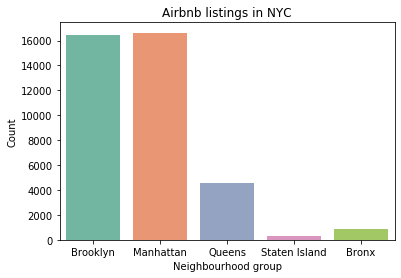

In [25]:
sns.countplot(data_0['neighbourhood_group'],palette='Set2')
plt.title('Airbnb listings in NYC')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.show()

There are greater number of airbnbs in Brooklyn and Manhattan compared to other three neighbourhoods, even though they get low number of reviews and their prices are relatively higher. It is understandable, since Manhattan is the center of business and arts with a good number of museums and theaters which attract tourists and Brooklyn is also a harbor of tourist attractions.

### Question three: What type of room is popular?

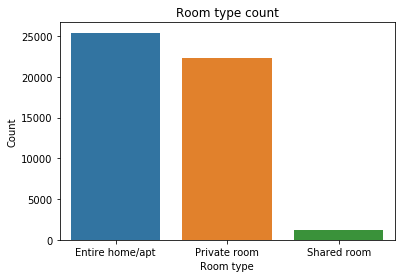

In [26]:
sns.countplot(data.sort_values('room_type').room_type)
plt.title('Room type count')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.show()

Text(3.799999999999997, 0.5, 'Number of reviews')

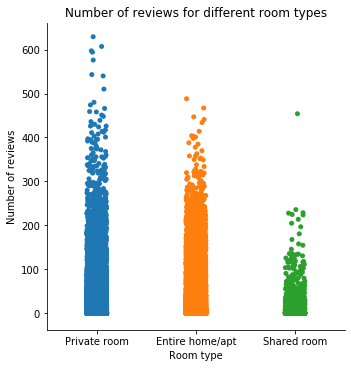

In [27]:
sns.catplot(x="room_type", y="number_of_reviews", data=data)
plt.title('Number of reviews for different room types')
plt.xlabel('Room type')
plt.ylabel('Number of reviews')

We could observe that most of the airbnbs in NYC are Entire Home/apartments and private rooms. And we could notice that listings with private room get slightly high number of reviews than entire home/apt.

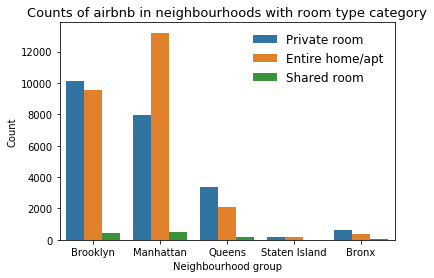

In [28]:
sns.countplot(data=data, x='neighbourhood_group', hue='room_type')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=13)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Text(38.398515625000016, 0.5, 'Number of reviews')

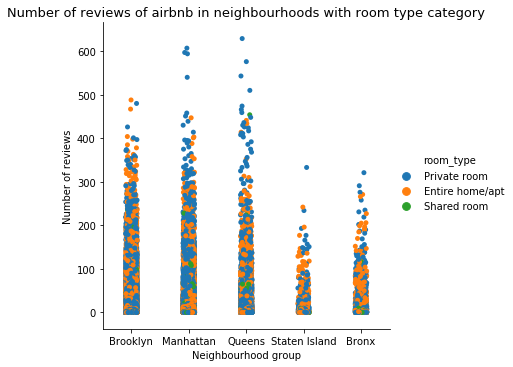

In [29]:
sns.catplot(data=data, x='neighbourhood_group', y = "number_of_reviews",hue='room_type')
plt.title('Number of reviews of airbnb in neighbourhoods with room type category', fontsize=13)
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of reviews')

If we look into different areas, we could notice that unlike other four areas, in Manhattan, the number of listings with entire home or apartment are higher than that with private room. I am not that familiar with New York City, and still could not find a reasonable explanation for that. 

### Question four: Find out what features distinguish each neighbourhood and predict which listing is in which neighbourhood using current data.

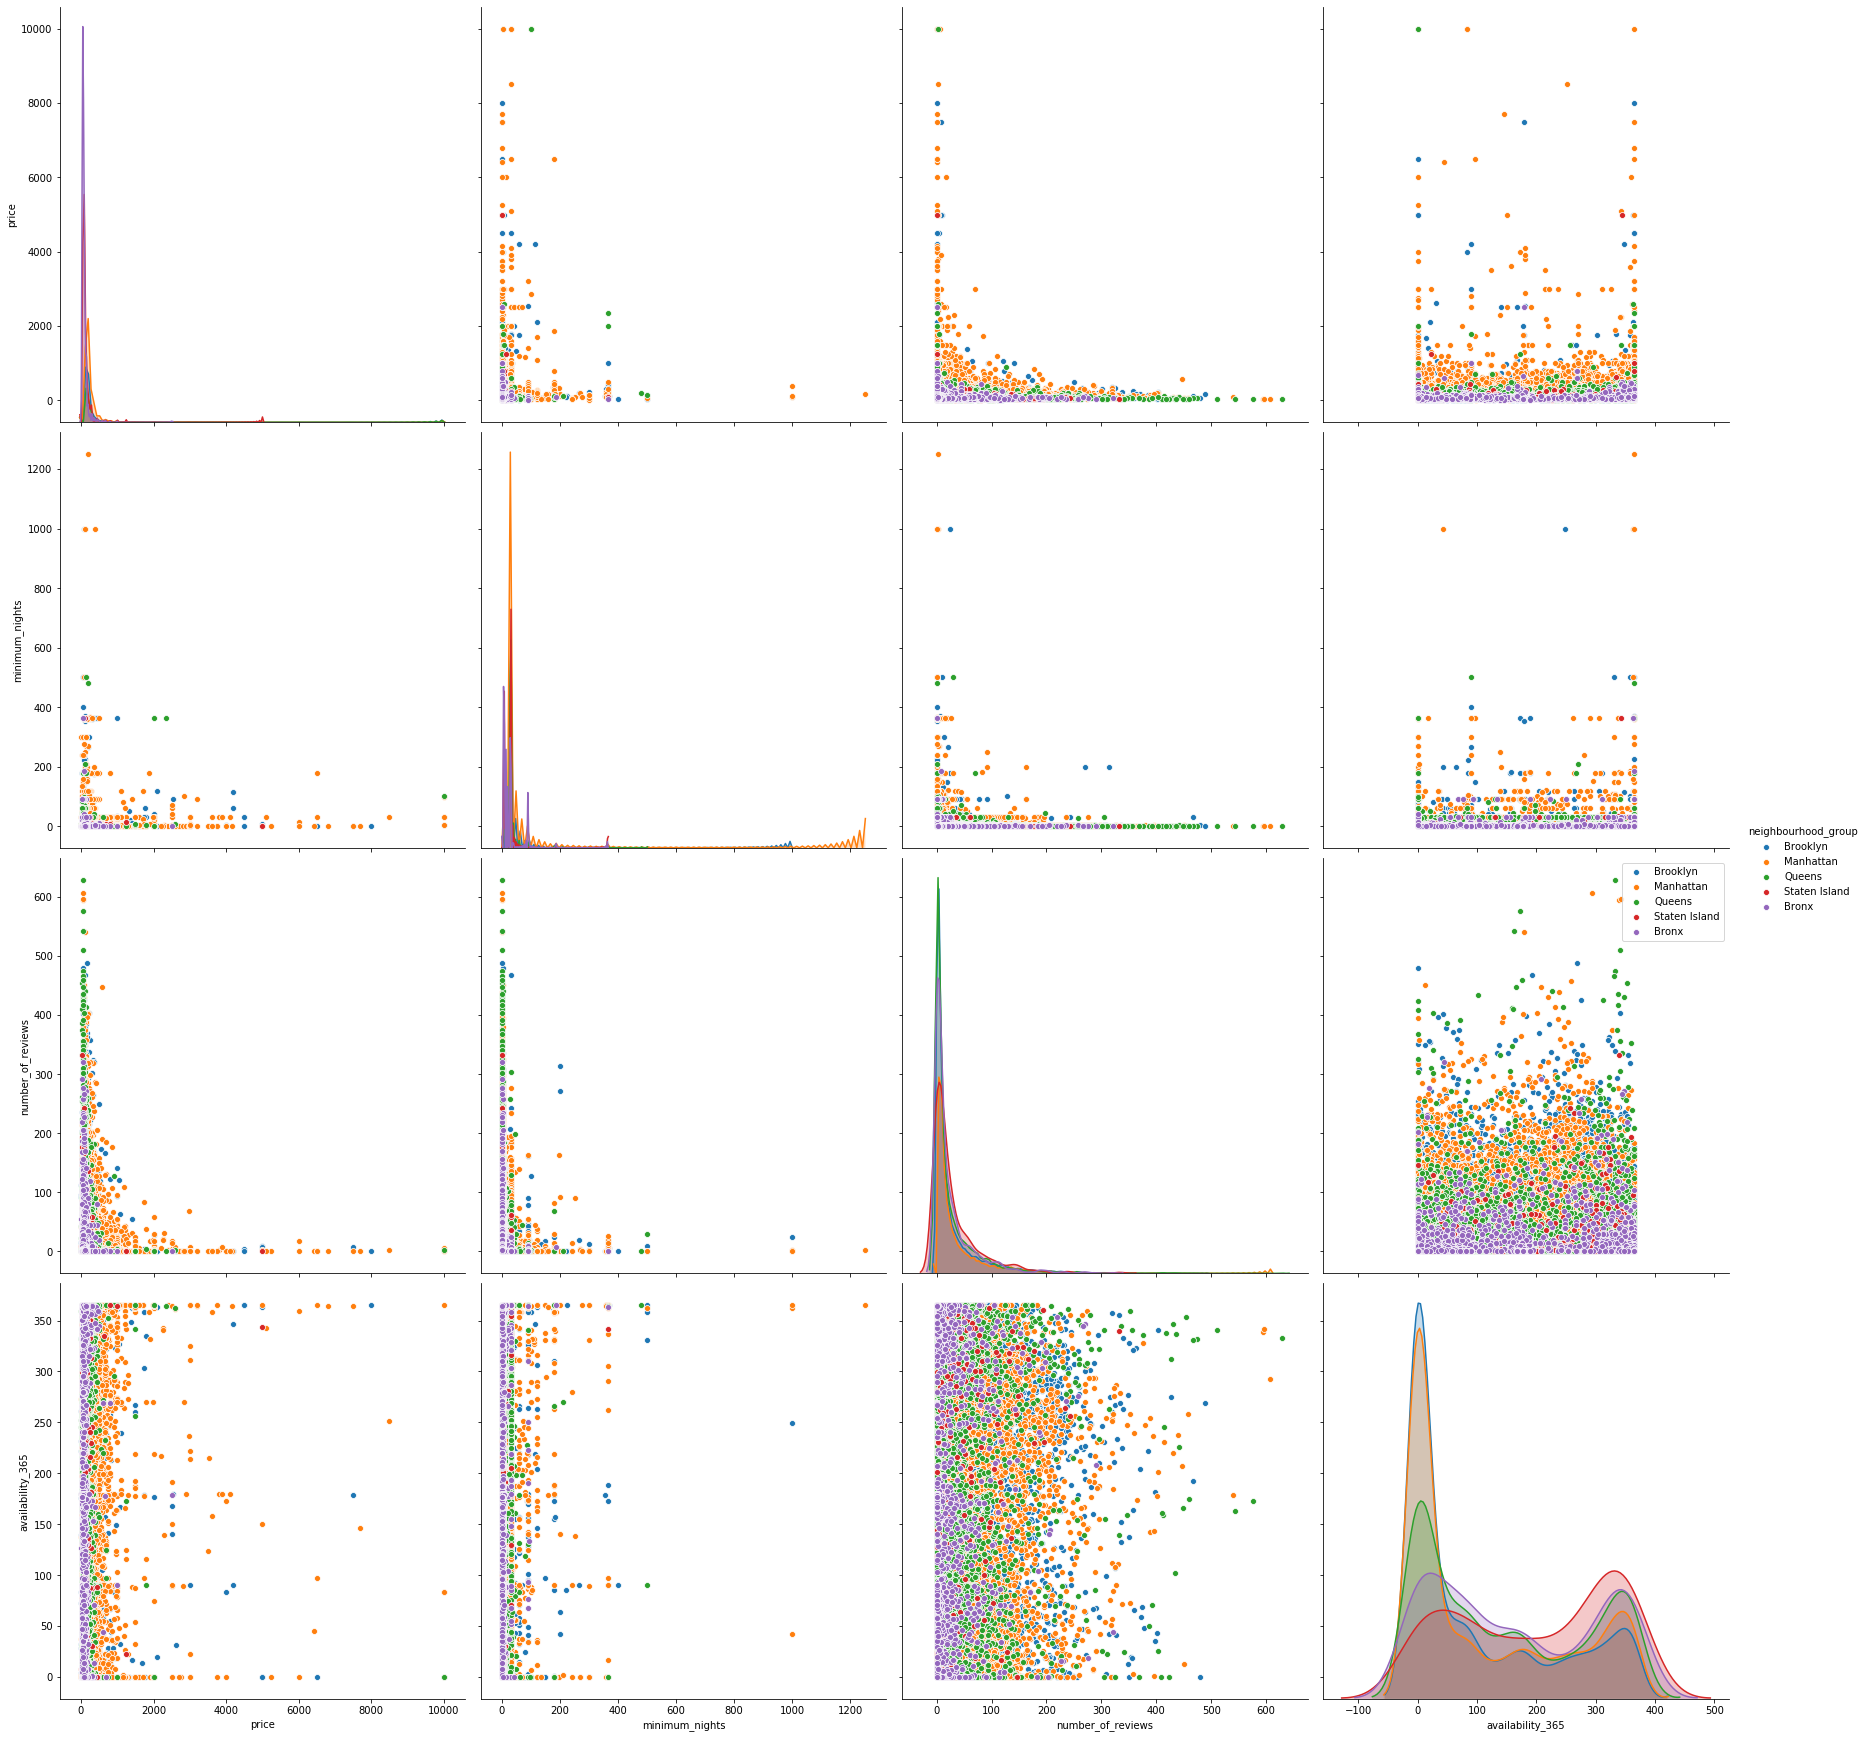

In [30]:
sns.pairplot(data,hue='neighbourhood_group',vars=['price','minimum_nights','number_of_reviews','availability_365'],size=6,diag_kind='kde');
plt.legend()
plt.show() 

In [31]:
# prepare data for classification 
df = data.copy()
df1 = data.copy()
df1.drop(['neighbourhood','host_id','longitude','latitude'], axis=1, inplace=True)

In [32]:
le = preprocessing.LabelEncoder()

le.fit(df1['neighbourhood_group'])
df1['neighbourhood_group']=le.transform(df1['neighbourhood_group'])

le.fit(df1['room_type'])
df1['room_type']=le.transform(df1['room_type'])


In [33]:
X = df1.drop(['neighbourhood_group'], inplace=False, axis=1)
y = df1['neighbourhood_group']
X.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,149,1,9,0.21,6,365
1,0,225,1,45,0.38,2,355
2,1,150,3,0,0.00,1,365
3,0,89,1,270,4.64,1,194
4,0,80,10,9,0.10,1,0


In [34]:
# split the complete dataset into training and testing datasets 70%-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training size and test size:
len(y_train),len(y_test)

(34226, 14669)

#### Build Random Forest classifier to predict the neighbourhood group variable.

In [35]:
# build a random forest
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')# 10 decision trees
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# test the model
predicted_type = rf_model.predict(X_test)

In [37]:
# see how accurate the model is
100 * accuracy_score(y_test.to_numpy(), predicted_type)

54.65266889358511

In [38]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25],
                 'max_depth': [2, 5, 7, 9],
             } #dictionary #n_estinators: how many decision trees

from sklearn.model_selection import GridSearchCV

In [39]:
grid_clf_5 = GridSearchCV(rf_model, param_grid, cv=5)
grid_clf_5.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, rand

In [40]:
# extract the best model:
grid_clf_5.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# best combination
grid_clf_5.best_params_

{'max_depth': 9, 'n_estimators': 15}

In [46]:
# build a random forest
rf_model = skens.RandomForestClassifier(n_estimators=15,max_depth=9,oob_score=True, criterion='entropy')# 10 decision trees
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
# test the model
predicted_type = rf_model.predict(X_test)

In [48]:
# see how accurate the model is
100 * accuracy_score(y_test.to_numpy(), predicted_type)

59.09741632013089

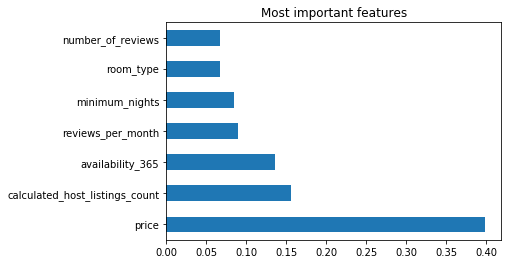

In [49]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.title("Most important features")
plt.show()

From the chart above, we notice that the price variable play an important role in distinguishing different neighbourhood groups. 